<a href="https://colab.research.google.com/github/StoryWeaversGuild/Heart_Disease_Predictor/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DAY 1-DATA PREPROCESSING**

In [4]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"storyweaversguild","key":"4a04fb4ad04b2986f4f768995fc3b1a4"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pip install kaggle

In [7]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 41.3MB/s]


In [8]:
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

In [9]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [10]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [11]:
df.isnull().sum()


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [12]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].mean())

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

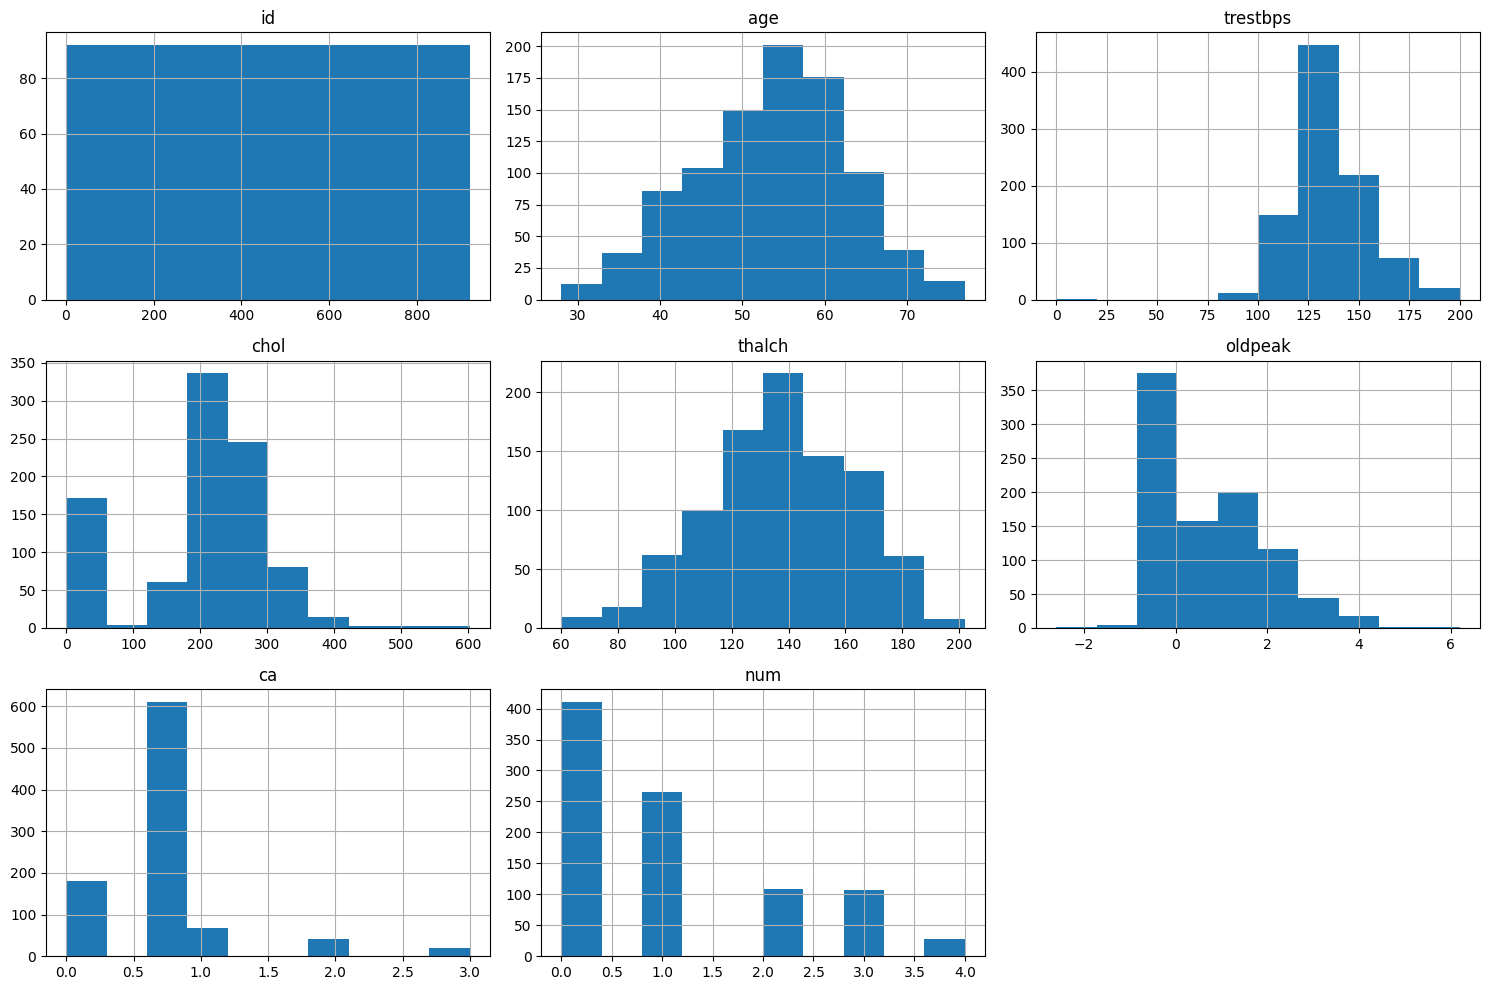

In [14]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

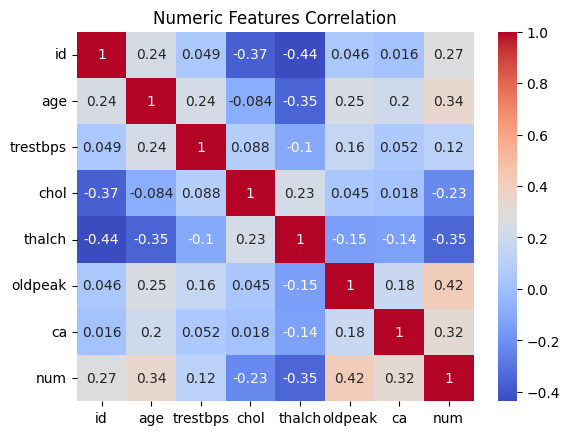

In [15]:
sns.heatmap(df[numeric_cols].corr(),annot = True,cmap='coolwarm')
plt.title('Numeric Features Correlation')
plt.show()

# **Day 2 - Feature Engineering**

In [16]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
  cat_cols.remove('num')

In [17]:
X = df.drop('num',axis=1)
y = (df['num']>0).astype(int)

In [18]:
X = pd.get_dummies(X, columns=cat_cols)
print("Final feature columns:",X.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


# **DAY 3 - Train/Test/Split,Normalization,Modeling and Evaluation**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score,classification_report

In [26]:
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.842391304347826
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



# **Day 4 : Random Forest and Feature Importance**

In [27]:
from sklearn.metrics import  confusion_matrix

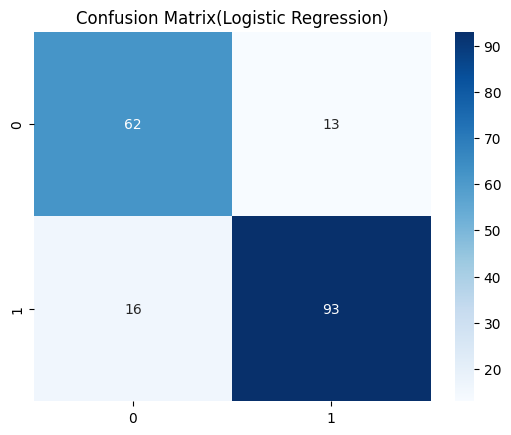

In [28]:
cm = confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix(Logistic Regression)')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [31]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


# **Feature Importance**

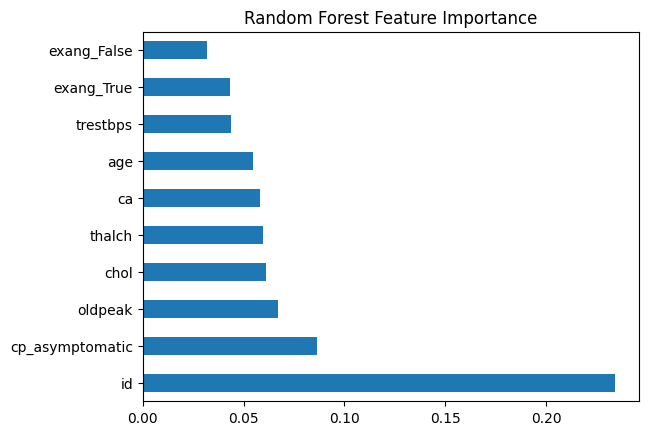

In [32]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()


# **Hyperparameter Tuning Using Bayesian Optimization**

In [33]:
!pip install bayesian-optimization

In [34]:
from bayes_opt import BayesianOptimization

In [35]:
def rf_cv(n_estimators, max_depth, min_samples_split):
    model = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=42
    )
    model.fit(X_tr, y_tr)
    preds = model.predict(X_val)
    return accuracy_score(y_val, preds)

# Define the parameter search space
param_bounds = {
    'n_estimators': (50, 200),
    'max_depth': (3, 15),
    'min_samples_split': (2, 10)
}

optimizer = BayesianOptimization(f=rf_cv, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)

print("Best Parameters:", optimizer.max)

|   iter    |  target   | n_esti... | max_depth | min_sa... |
-------------------------------------------------------------
| 1         | 0.8716216 | 106.18101 | 14.408571 | 7.8559515 |
| 2         | 0.8581081 | 139.79877 | 4.8722236 | 3.2479561 |
| 3         | 0.8783783 | 58.712541 | 13.394113 | 6.8089200 |
| 4         | 0.8581081 | 156.21088 | 3.2470139 | 9.7592788 |
| 5         | 0.8716216 | 174.86639 | 5.5480693 | 3.4545997 |
| 6         | 0.8716216 | 60.313085 | 12.395860 | 7.3832188 |
| 7         | 0.8716216 | 56.197639 | 13.558203 | 6.5382431 |
| 8         | 0.8648648 | 59.261275 | 15.0      | 5.2665128 |
| 9         | 0.8716216 | 58.060820 | 12.625788 | 7.5335808 |
| 10        | 0.8581081 | 59.157260 | 13.967405 | 7.6288259 |
| 11        | 0.8716216 | 60.448136 | 12.228540 | 7.4162676 |
| 12        | 0.8783783 | 58.410304 | 13.008443 | 6.6701257 |
| 13        | 0.8648648 | 59.046045 | 13.058187 | 6.1743318 |
| 14        | 0.8783783 | 58.160346 | 13.440948 | 6.8584989 |
| 15    

In [36]:
best_params = optimizer.max['params']
model = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    random_state=42
)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=13, min_samples_split=6, n_estimators=58,
                       random_state=42)

In [37]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        75
           1       0.92      0.90      0.91       109

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [38]:
print("Overall Accuracy Score", accuracy_score(y_test, y_pred))

Overall Accuracy Score 0.8913043478260869


# **SVM with RBF kernel Using Bayesian optimization**

In [52]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.1 MB/s eta 0:00:00


In [53]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", probability=True, random_state=42))
])


In [54]:
search_space = {
    "svc__C": (1e-2, 1e3, "log-uniform"),
    "svc__gamma": (1e-4, 1e1, "log-uniform"),
    "svc__class_weight": ["balanced", None]
}


In [55]:
opt = BayesSearchCV(
    estimator=pipe,
    search_spaces=search_space,
    n_iter=40,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

opt.fit(X_train, y_train)
print("Best params:", opt.best_params_)
print("CV best score:", opt.best_score_)


Best params: OrderedDict({'svc__C': 1000.0, 'svc__class_weight': None, 'svc__gamma': 0.00045462310109855273})
CV best score: 0.8559753631182202


In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = opt.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test accuracy: 0.875
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        75
           1       0.90      0.89      0.89       109

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# **Kernel approximation Using Logistic Regression (explicit projection)**

**Pipeline with RBFSampler**

In [57]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV

pipe_kfeat = Pipeline([
    ("scaler", StandardScaler()),
    ("rbf", RBFSampler(random_state=42)),   # maps to higher-dim features
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])


**Bayesian search space**

In [58]:
space_kfeat = {
    "rbf__gamma": (1e-4, 1e1, "log-uniform"),
    "rbf__n_components": (100, 1000),      # dimensionality of the projected space
    "logreg__C": (1e-3, 1e3, "log-uniform")
}

opt_kfeat = BayesSearchCV(
    estimator=pipe_kfeat,
    search_spaces=space_kfeat,
    n_iter=40,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

opt_kfeat.fit(X_train, y_train)
print("Best params (kernel features):", opt_kfeat.best_params_)
print("CV best score (kernel features):", opt_kfeat.best_score_)


Best params (kernel features): OrderedDict({'logreg__C': 82.33865395437454, 'rbf__gamma': 0.0055120888619103105, 'rbf__n_components': 671})
CV best score (kernel features): 0.8505239933811362


In [59]:
y_pred_k = opt_kfeat.predict(X_test)
print("Test accuracy (kernel features):", accuracy_score(y_test, y_pred_k))
print(classification_report(y_test, y_pred_k))

import joblib
joblib.dump(opt_kfeat.best_estimator_, "heart_rbf_features_logreg_tuned.pkl")


Test accuracy (kernel features): 0.8586956521739131
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        75
           1       0.89      0.87      0.88       109

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.86      0.86       184



['heart_rbf_features_logreg_tuned.pkl']

# **Save the Model Into Our Environement**

In [42]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')


['heart_scaler.pkl']

In [43]:
sample =X.head(1)
sample.to_csv('Heart_user_template.csv',index = False)
print("User Template  saved as  'Heart_user_template.csv' ")

User Template  saved as  'Heart_user_template.csv' 


In [44]:
import joblib

# Save tuned model separately
joblib.dump(model, 'heart_rf_model_tuned.pkl')

# Save scaler (if needed for preprocessing)
joblib.dump(scaler, 'heart_scaler1.pkl')


['heart_scaler1.pkl']

In [45]:
tuned_model = joblib.load('heart_rf_model_tuned.pkl')


# **Day 5 - User Upload & Prediction**

In [49]:
from google.colab import files

uploaded = files.upload()  # User uploads their patient data as CSV (same columns as sample template)

Saving Heart_dataset.csv to Heart_dataset.csv


In [50]:
import joblib
import pandas as pd

user_df = pd.read_csv('Heart_dataset.csv')

# Get column lists from training dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# Drop columns not in user_df to avoid errors
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# Fill missing values in numeric columns with training set mean
user_df[numeric_cols] = user_df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with 'Unknown'
for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

# Convert boolean columns to int
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

# One-hot encode categorical columns
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

# Align columns with training features X.columns
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale data
scaler = joblib.load('heart_scaler1.pkl')
user_scaled = scaler.transform(user_df_encoded)

# Predict
model = joblib.load('heart_rf_model_tuned.pkl')
preds = model.predict(user_scaled)
user_df['Heart_Disease_Prediction'] = preds

print(user_df)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
